<h1 align='center'>Implementando uma rede neural artificial multicamada do zero</h1>
<p align=center><img src=https://miro.medium.com/max/1400/1*BIpRgx5FsEMhr1k2EqBKFg.gif width=500></p>

Como você deve saber, o aprendizado profundo está recebendo muita atenção da imprensa e é, sem dúvida, o tópico mais quente no campo do aprendizado de máquina. O aprendizado profundo pode ser entendido como um subcampo do aprendizado de máquina que se preocupa em treinar redes neurais artificiais (ANN) com muitas camadas de forma eficiente. Agora, você aprenderá os conceitos básicos de ANN para estar bem equipado para os assuntos seguintes, que apresentarão bibliotecas avançadas de aprendizado profundo baseadas em *Python* e arquiteturas de redes neurais profundas (DNN) que são particularmente adequadas para imagens e análises de texto.

### Modelando funções complexas com redes neurais artificiais

Os neurônios artificiais representam os blocos de construção das ANN multicamadas que discutiremos mais a frente.

O conceito básico por trás das ANN foi construído com base em hipóteses e modelos de como o cérebro humano funciona para resolver problemas complexos. Embora as ANN tenham ganhado muita popularidade nos últimos anos, os primeiros estudos de ANN remontam à década de 1940, quando *Warren McCulloch* e *Walter Pitts* descreveram pela primeira vez como os neurônios poderiam funcionar. No entanto, nas décadas que se seguiram à primeira implementação do **McCulloch -Modelo de neurônios Pitts** - o perceptron de *Rosenblatt* na década de 1950 - muitos pesquisadores e praticantes de aprendizado de máquina começaram lentamente a perder o interesse em ANN, já que ninguém tinha uma boa solução para treinar uma rede neural com várias camadas. Eventualmente, o interesse em ANN foi reacendido em 1986, quando *D.E. Rumelhart*, *G. E. Hinton* e *R. J. Williams* estiveram envolvidos na "redescoberta" e popularização do algoritmo de retropropagação para treinar ANN com mais eficiência, que discutiremos com mais detalhes posteriormente.

No entanto, as ANN são mais populares hoje do que nunca, graças aos muitos avanços importantes que foram feitos na década anterior, que resultaram no que agora chamamos de algoritmos e arquiteturas de aprendizado profundo – ANN compostos de muitas camadas. As ANN são um tema quente não apenas na pesquisa acadêmica, mas também em grandes empresas de tecnologia, como *Facebook*, *Microsoft*, *Amazon*, *Uber* e *Google*, que investem pesadamente em ANN artificiais e pesquisa de aprendizado profundo.

A partir de hoje, ANN complexas e alimentadas por algoritmos de aprendizado profundo são considerados as soluções de última geração para a resolução de problemas complexos, como reconhecimento de imagem e voz. Exemplos populares de produtos em nossa vida cotidiana que são alimentados por aprendizado profundo são a pesquisa de imagens do *Google* e o *Google Translate* – um aplicativo para smartphones que pode reconhecer automaticamente texto em imagens para tradução em tempo real em mais de 20 idiomas.


### Apresentando a arquitetura de rede neural multicamada
Você aprenderá como conectar vários neurônios únicos a um Rede Neural *feedforward* multicamada; esse tipo especial de rede totalmente conectada também é chamado de **MLP**.

<p align=center><img src=https://www.knime.com/sites/default/files/3-intro-deep-neural-networks.png width=500></p>

O **MLP** representado na figura anterior tem uma camada de entrada, uma camada oculta e uma camada de saída. As unidades na camada oculta estão totalmente conectadas à camada de entrada e a camada de saída está totalmente conectada à camada oculta. Se essa rede tiver mais de uma camada oculta, também a chamamos de **Rede Neural Artificial profunda**.

>#### Adicionando camadas ocultas adicionais
> Podemos adicionar qualquer número de camadas ocultas ao **MLP** para criar arquiteturas de rede mais profundas. Na prática, podemos pensar no número de camadas e unidades em uma RN como hiperparâmetros adicionais que queremos otimizar para uma determinada tarefa de problema usando a técnica de validação cruzada.
> No entanto, os gradientes de erro, que calcularemos posteriormente via retropropagação, se tornarão cada vez menores à medida que mais camadas forem adicionadas a uma rede. Esse problema de **gradiente de fuga** torna o aprendizado do modelo mais desafiador. Portanto, algoritmos especiais foram desenvolvidos para ajudar a treinar essas estruturas DNN; isso é conhecido como **Aprendizagem Profunda**.

In [1]:
# Carregando MNIST usando o scikit-learn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = ((X / 255.) - .5) * 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=123, stratify=y)

In [2]:
clf = MLPClassifier(random_state=1, 
                    max_iter=300,
                    hidden_layer_sizes=100,
                    shuffle=True,
                    batch_size=100,
                    learning_rate_init=0.0005,
                    alpha=0.01,
                    validation_fraction=0.2,
                    early_stopping=False).fit(X_train, y_train)

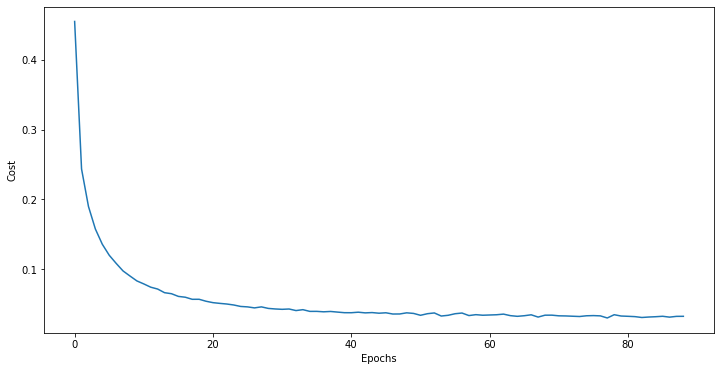

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(clf.loss_curve_)

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

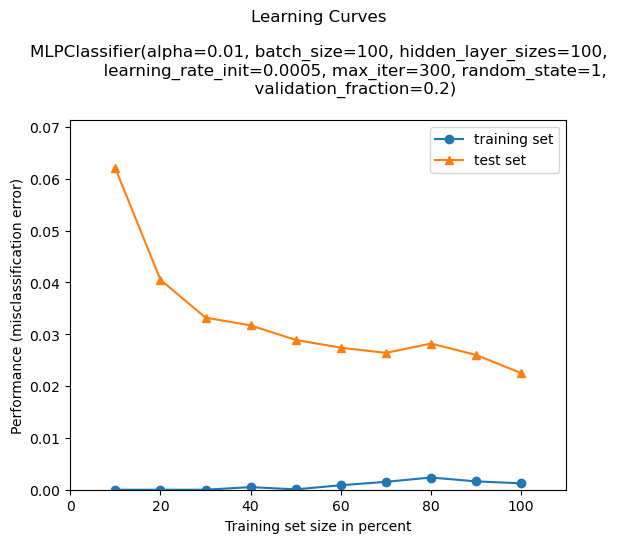

In [18]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf)
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
y_test_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_test_pred)
print(f"Acurácia: {acc:.2%}")

Acurácia: 97.75%


Apesar do leve *overfitting* nos dados de treinamento, nossa Rede Neural de uma camada oculta relativamente simples alcançou um desempenho relativamente bom no conjunto de dados de teste, semelhante à precisão do conjunto de dados de validação (*97,75%*).